In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
mat_dir = "/content/drive/MyDrive/hustUnzip/HUST bearing a practical dataset for ball bearing fault diagnosis/HUST bearing dataset"


**Charger les fichiers MATLAB et créer des fichiers CSV**

In [ ]:

# # Liste des classes
# classes = ['I', 'O', 'B', 'IO', 'OB', 'IB', 'N']

# # Parcourir chaque classe
# for c in classes:
#     # Liste pour stocker les données de chaque classe
#     data_list = []

#     # Parcourir chaque fichier MATLAB de la classe c
#     for file_name in os.listdir(mat_dir):
#         if file_name.startswith(c):

#             data = sio.loadmat(os.path.join(mat_dir, file_name))

#             # Extraire les données pertinentes (par exemple, 'data', 'fs', 'rpm')
#             vibration_data = data['data']
#             time = range(len(vibration_data))  # Temps en fonction de l'échantillonnage

#             # Créer un DataFrame pandas
#             df = pd.DataFrame({'Time': time, 'Vibration': vibration_data.squeeze()})

#             # Enregistrer le DataFrame dans un fichier CSV
#             csv_file = os.path.join("/content/drive/MyDrive/hustUnzip/classes", f"{file_name[:-4]}.csv")
#             df.to_csv(csv_file, index=False)

#             # Ajouter les données à la liste de données de la classe
#             data_list.append(df)

#     # Vérifier s'il y a des données à concaténer
#     if data_list:
#         # Fusionner les DataFrames de la classe en un seul DataFrame
#         class_df = pd.concat(data_list, ignore_index=True)

#         # Enregistrer le DataFrame de la classe dans un fichier CSV
#         class_csv = os.path.join("/content/drive/MyDrive/hustUnzip/classes", f"{c}_data.csv")
#         class_df.to_csv(class_csv, index=False)
#     else:
#         print(f"No data found for class {c}")

# print("Data processing completed.")


**Visualiser les données et les tableaux obtenus**

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Charger un fichier CSV de classe de roulement spécifique
# file_path = "/content/drive/MyDrive/hustUnzip/classes/Normal/N4/N400.csv"
# df = pd.read_csv(file_path)

# # Afficher les premières lignes du DataFrame
# print(df.head())

# # Tracer les données de vibration en fonction du temps
# plt.figure(figsize=(10, 6))
# plt.plot(df['Time'], df['Vibration'])
# plt.xlabel('Time')
# plt.ylabel('Vibration')
# plt.title('Vibration Data for Class N')
# plt.grid(True)
# plt.show()


# **Segmentation**

In [ ]:
# import os
# import pandas as pd
# import numpy as np

# # Chemin vers le répertoire contenant les fichiers d'entrée
# input_directory = "/content/drive/MyDrive/hustUnzip/classes"

# # Chemin vers le répertoire où vous souhaitez enregistrer tous les fichiers CSV de sortie
# output_directory = "/content/drive/MyDrive/hustUnzip/segments"

# # Assurez-vous que le répertoire de sortie existe, sinon créez-le
# os.makedirs(output_directory, exist_ok=True)

# # Parcourir tous les fichiers dans le répertoire d'entrée
# for root, dirs, files in os.walk(input_directory):
#     for file in files:
#         if file.endswith(".csv"):  # Assurez-vous de ne traiter que les fichiers CSV
#             # Chemin complet du fichier d'entrée
#             input_file = os.path.join(root, file)

#             # Charger le fichier CSV
#             df = pd.read_csv(input_file)

#             # Segmenter le signal en 250 segments de longueur 2048
#             segment_length = 2048
#             num_segments = 250

#             segments = []
#             for i in range(num_segments):
#                 start_index = i * segment_length
#                 end_index = start_index + segment_length
#                 segment = df['Vibration'].iloc[start_index:end_index]
#                 segments.append(segment.values)

#             # Créer un DataFrame pour les segments
#             segments_df = pd.DataFrame(segments)

#             # Chemin complet vers le fichier de sortie
#             output_file = os.path.join(output_directory, f"segments_{file}")

#             # Enregistrer les segments dans un fichier CSV
#             segments_df.to_csv(output_file, index=False, header=False)

# print("Tous les fichiers ont été traités avec succès et les segments ont été enregistrés.")


**normalisation**

In [ ]:
# import os
# import pandas as pd
# import numpy as np

# # Chemin vers le répertoire contenant les fichiers d'entrée
# input_directory = "/content/drive/MyDrive/hustUnzip/segments"

# # Chemin vers le répertoire où vous souhaitez enregistrer tous les fichiers CSV de sortie
# output_directory = "/content/drive/MyDrive/hustUnzip/segments_normalisés"

# # Assurez-vous que le répertoire de sortie existe, sinon créez-le
# os.makedirs(output_directory, exist_ok=True)

# # Parcourir tous les fichiers dans le répertoire d'entrée
# for root, dirs, files in os.walk(input_directory):
#     for file in files:
#         if file.endswith(".csv"):  # Assurez-vous de ne traiter que les fichiers CSV
#             # Chemin complet du fichier d'entrée
#             input_file = os.path.join(root, file)

#             # Charger le fichier CSV
#             df = pd.read_csv(input_file, header=None)


#             # Normaliser les valeurs par ligne entre 0 et 1
#             min_vals = df.min(axis=1)  # Trouver les valeurs minimales par ligne
#             max_vals = df.max(axis=1)  # Trouver les valeurs maximales par ligne
#             df_normalized = (df.sub(min_vals, axis=0)).div((max_vals - min_vals), axis=0)

#             # Enregistrer le fichier CSV normalisé
#             output_file = os.path.join(output_directory, f"segments_normalisés_{file}")

#             # Enregistrer les segments dans un fichier CSV
#             df_normalized.to_csv(output_file, index=False, header=False)

# print("Tous les fichiers ont été traités avec succès et les segments ont été enregistrés.")


**Affichage de qq segments**

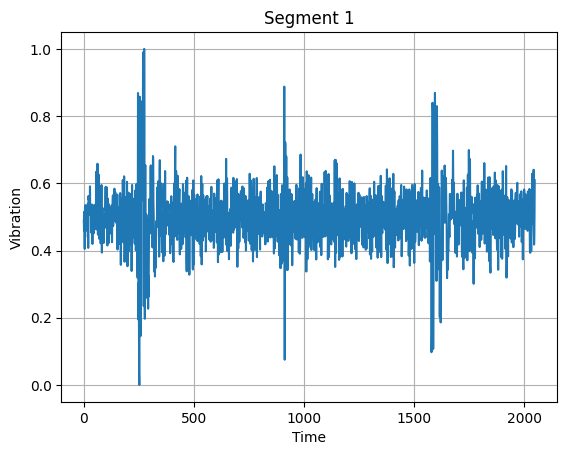

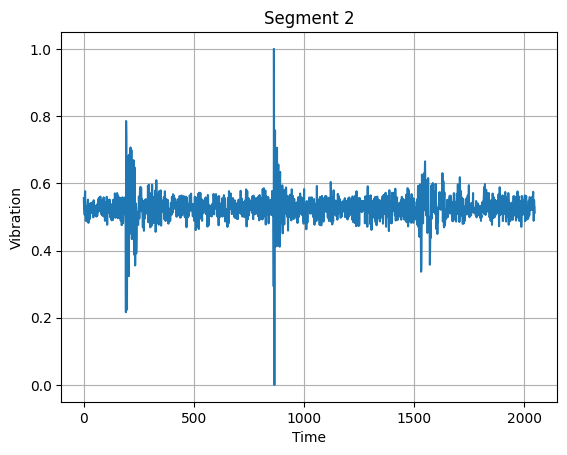

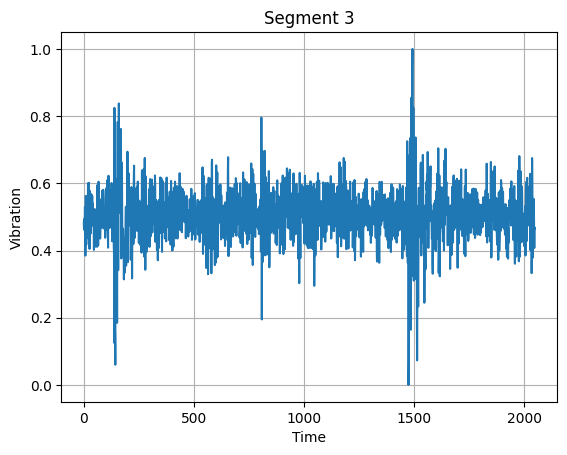

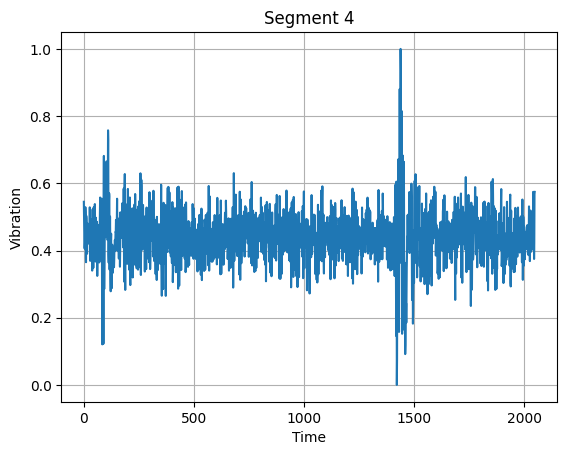

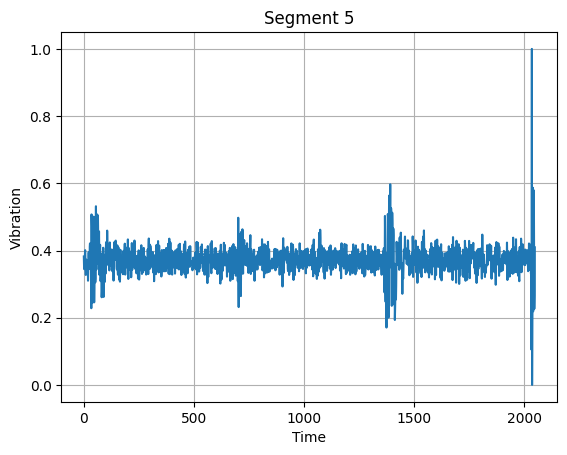

In [ ]:

# Chemin vers le fichier CSV contenant les segments
input_file = "/content/drive/MyDrive/hustUnzip/segments_normalisés/Outer/O4/segments_normalisés_segments_O400.csv"

# Nombre de lignes à afficher
num_lines = 5

# Lire les premières lignes du fichier CSV
with open(input_file, 'r') as file:
    for i, line in enumerate(file):
        if i >= num_lines:
            break
        values = line.strip().split(',')  # Séparer les valeurs par des virgules
        values = [float(value) for value in values]

        # Créer une liste d'abscisses de 0 à 2047
        abscisses = list(range(len(values)))

        # Tracer le signal
        plt.figure()
        plt.plot(abscisses, values)
        plt.xlabel('Time')
        plt.ylabel('Vibration')
        plt.title(f'Segment {i+1}')
        plt.grid(True)

plt.show()

In [ ]:
!pip install pyts

**génération des images selon la methode GADF**

In [ ]:
import os
import pandas as pd
import numpy as np
from pyts.image import GramianAngularField
from skimage.transform import resize
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les classes
folder_path = "/content/drive/MyDrive/hustUnzip/segments_normalisés_R7"

# Chemin vers le dossier où vous souhaitez enregistrer les images GADF
output_folder = "/content/drive/MyDrive/hustUnzip/images_GADF_R7"

# Initialiser l'objet GramianAngularField
transformer = GramianAngularField(image_size=1024, method='difference')

# Parcourir les classes et sous-classes
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
          class_path = os.path.join(root, subdir)
          # Parcourir les fichiers .csv dans le sous-dossier de chaque classe
          for file in os.listdir(class_path):
              if file.endswith(".csv"):
                  # Construire le chemin complet vers le fichier .csv
                  csv_file_path = os.path.join(class_path, file)
                  # Charger le fichier CSV de segments
                  segments_df = pd.read_csv(csv_file_path, header=None)
                  # Créer un dossier pour chaque classe si nécessaire
                  class_output_folder = os.path.join(output_folder, subdir)
                  if not os.path.exists(class_output_folder):
                      os.makedirs(class_output_folder)
                  # Transformer chaque segment en image GADF
                  for i in range(len(segments_df)):
                      segment_values = segments_df.iloc[i].values.reshape(1, -1)
                      gadf_image = transformer.transform(segment_values)

                      # Resize the image to 224x224
                      resized_image = resize(gadf_image[0], (224, 224))

                      # Construire le chemin de sortie pour l'image
                      output_filename = f"{os.path.splitext(file)[0]}_segment_{i}.png"
                      output_path = os.path.join(class_output_folder, output_filename)
                      # Enregistrer l'image GADF dans le dossier de destination
                      plt.imsave(output_path, resized_image, cmap='rainbow', origin='lower')


**génération des images selon la méthode gasf**

In [ ]:
import os
import pandas as pd
import numpy as np
from pyts.image import GramianAngularField
from skimage.transform import resize
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les classes
folder_path = "/content/drive/MyDrive/hustUnzip/segments_normalisés_R7"

# Chemin vers le dossier où vous souhaitez enregistrer les images GADF
output_folder = "/content/drive/MyDrive/hustUnzip/images_GASF_R7"

# Initialiser l'objet GramianAngularField
transformer = GramianAngularField(image_size=1024, method='summation')

# Parcourir les classes et sous-classes
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
          class_path = os.path.join(root, subdir)
          # Parcourir les fichiers .csv dans le sous-dossier de chaque classe
          for file in os.listdir(class_path):
              if file.endswith(".csv"):
                  # Construire le chemin complet vers le fichier .csv
                  csv_file_path = os.path.join(class_path, file)
                  # Charger le fichier CSV de segments
                  segments_df = pd.read_csv(csv_file_path, header=None)
                  # Créer un dossier pour chaque classe si nécessaire
                  class_output_folder = os.path.join(output_folder, subdir)
                  if not os.path.exists(class_output_folder):
                      os.makedirs(class_output_folder)
                  # Transformer chaque segment en image GADF
                  for i in range(len(segments_df)):
                      segment_values = segments_df.iloc[i].values.reshape(1, -1)
                      gasf_image = transformer.transform(segment_values)

                      # Resize the image to 224x224
                      resized_image = resize(gasf_image[0], (224, 224))

                      # Construire le chemin de sortie pour l'image
                      output_filename = f"{os.path.splitext(file)[0]}_segment_{i}.png"
                      output_path = os.path.join(class_output_folder, output_filename)
                      # Enregistrer l'image GADF dans le dossier de destination
                      plt.imsave(output_path, resized_image, cmap='rainbow', origin='lower')


**génération des images selon la méthode Mtf(classe par classe)**

In [ ]:
import os
import pandas as pd
import numpy as np
from pyts.image import MarkovTransitionField
from skimage.transform import resize
import matplotlib.pyplot as plt

# Path to the folder containing the dataset
folder_path = "/content/drive/MyDrive/hustUnzip/segments_normalisés_R7"

# Path to the folder where you want to save the MTF images
output_folder = "/content/drive/MyDrive/hustUnzip/Mtf_images_R7/InnerOuter"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Initialize the MarkovTransitionField object
transformer = MarkovTransitionField(image_size=1024)

# Traverse classes and sub-classes
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
        if subdir == "InnerOuter":
            # Construct the full path to the subfolder
            class_path = os.path.join(root, subdir)

            # Iterate over CSV files in the subfolder
            for file in os.listdir(class_path):
                if file.endswith(".csv"):
                    # Construct the full path to the CSV file
                    csv_file_path = os.path.join(class_path, file)

                    # Load the CSV file with segments
                    segments_df = pd.read_csv(csv_file_path, header=None)

                    # Iterate through all segments in the file
                    for i, segment in enumerate(segments_df.values):
                        # Transform the segment into an MTF image
                        segment_values = segment.reshape(1, -1)
                        mtf_image = transformer.transform(segment_values)

                        # Resize the image to 224x224
                        resized_image = resize(mtf_image[0], (224, 224))

                        # Construct the output path for the image
                        output_filename = (
                            os.path.splitext(file)[0] + f"_segment{i}.png"
                        )  # Filename based on the CSV file and segment number
                        output_path = os.path.join(output_folder, output_filename)

                        # Save the MTF image to the destination folder
                        plt.imsave(output_path, resized_image, cmap='rainbow', origin='lower')


**génération des images selon RP colorés(classe par classe)**

In [ ]:
import os
import pandas as pd
import numpy as np
from pyts.image import RecurrencePlot
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Directory containing the CSV files for different classes
folder_path = "/content/drive/MyDrive/hustUnzip/segments_normalisés_R7"

# Directory to save the recurrence plot images
output_folder = "/content/drive/MyDrive/hustUnzip/Rp_Colored_images_R7/Ball"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Initialize the RecurrencePlot object
recurrence_plot_transformer = RecurrencePlot(
    threshold='point', percentage=20, dimension=1
)

# Traverse the classes and sub-classes
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
        if subdir == "Ball":
            # Full path to the subdirectory
            class_path = os.path.join(root, subdir)
            # Traverse the CSV files in the subdirectory
            for file in os.listdir(class_path):
                if file.endswith(".csv"):
                    # Full path to the CSV file
                    csv_file_path = os.path.join(class_path, file)
                    # Load the CSV file into a DataFrame
                    segments_df = pd.read_csv(csv_file_path, header=None)
                    # Loop over each segment in the CSV file
                    for i, segment in enumerate(segments_df.values):
                        # Transform the segment into a recurrence plot
                        segment_values = segment.reshape(1, -1)
                        rp_image = recurrence_plot_transformer.fit_transform(segment_values)

                        # Resize the image to 224x224
                        resized_rp_image = resize(rp_image[0], (224, 224))

                        # Construct the output path for the recurrence plot image
                        output_filename = os.path.splitext(file)[0] + f"_segment{i}.png"
                        output_path = os.path.join(output_folder, output_filename)

                        # Save the recurrence plot image
                        plt.imsave(output_path, resized_rp_image, cmap='rainbow', origin='lower')


**génération des images selon RP binaire(classe par classe)**

In [ ]:
import os
import pandas as pd
import numpy as np
from pyts.image import RecurrencePlot
import matplotlib.pyplot as plt
from skimage.transform import resize

# Directory containing the CSV files for different classes
folder_path = "/content/drive/MyDrive/hustUnzip/segments_normalisés_R7"

# Directory to save the recurrence plot images
output_folder = "/content/drive/MyDrive/hustUnzip/Rp_Binary_images_R7/Normal"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Initialize the RecurrencePlot object
recurrence_plot_transformer = RecurrencePlot(
    threshold='point', percentage=20, dimension=1
)

# Traverse the classes and sub-classes
for root, dirs, files in os.walk(folder_path):
    for subdir in dirs:
        if subdir == "Normal":
            # Full path to the subdirectory
            class_path = os.path.join(root, subdir)
            # Traverse the CSV files in the subdirectory
            for file in os.listdir(class_path):
                if file.endswith(".csv"):
                    # Full path to the CSV file
                    csv_file_path = os.path.join(class_path, file)
                    # Load the CSV file into a DataFrame
                    segments_df = pd.read_csv(csv_file_path, header=None)
                    first_segment = segments_df.iloc[0]

                    # Loop over each segment in the CSV file
                    for i, segment in enumerate(segments_df.values):
                        # Transform the segment into a recurrence plot
                        segment_values = segment.reshape(1, -1)
                        rp_image = recurrence_plot_transformer.fit_transform(segment_values)
                        # Resize the image to 224x224
                        resized_rp_image = resize(rp_image[0], (224, 224))
                        # Construct the output path for the recurrence plot image
                        output_filename = os.path.splitext(file)[0] + f"_segment{i}.png"
                        output_path = os.path.join(output_folder, output_filename)
                        # Save the recurrence plot image
                        plt.imsave(output_path,  resized_rp_image , cmap='binary', origin='lower')

# Model

In [ ]:
import os
from PIL import Image

def parcourir_repertoire(root_dir):
    images = []
    labels = []

    for subdir, dirs, _ in os.walk(root_dir):
        for folder in dirs:
            label = os.path.basename(folder)
            for file in os.listdir(os.path.join(subdir, folder)):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(subdir, folder, file)
                    image = Image.open(image_path)
                    images.append(image)
                    labels.append(label)

    return images, labels

# Spécifiez le répertoire racine ici
repertoire_racine = "/content/drive/MyDrive/hustUnzip/images_GADF_R7"

images, labels = parcourir_repertoire(repertoire_racine)

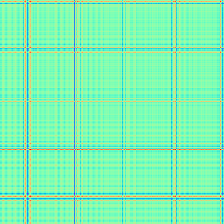

In [ ]:
images[0]

In [ ]:
labels[0]

'Ball'

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Map labels to numerical values
label_mapping = {"Normal": 0, "Ball": 1, "Inner": 2, "Outer": 3, "OuterBall": 4, "InnerBall": 5, "InnerOuter": 6}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Convert labels to one-hot encoded vectors
labels_one_hot = to_categorical(labels_numeric, num_classes=7)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
132/132 [==============================] - 10s 57ms/step - loss: 2.3848 - accuracy: 0.1460 - val_loss: 1.9638 - val_accuracy: 0.1448
Epoch 2/20
132/132 [==============================] - 7s 55ms/step - loss: 2.2022 - accuracy: 0.1421 - val_loss: 1.9609 - val_accuracy: 0.1486
Epoch 3/20
132/132 [==============================] - 7s 52ms/step - loss: 2.1149 - accuracy: 0.1414 - val_loss: 1.9589 - val_accuracy: 0.1267
Epoch 4/20
132/132 [==============================] - 7s 55ms/step - loss: 2.0589 - accuracy: 0.1362 - val_loss: 1.9485 - val_accuracy: 0.1267
Epoch 5/20
132/132 [==============================] - 7s 51ms/step - loss: 1.7135 - accuracy: 0.2986 - val_loss: 1.5595 - val_accuracy: 0.2762
Epoch 6/20
132/132 [==============================] - 7s 55ms/step - loss: 1.3252 - accuracy: 0.4540 - val_loss: 1.2090 - val_accuracy: 0.5581
Epoch 7/20
132/132 [==============================] - 7s 51ms/step - loss: 1.1699 - accuracy: 0.5131 - val_loss: 1.0436 - val_accuracy: 0.622

In [ ]:
print("training details :")
print("Accuracy :", history.history['accuracy'])
print("training loss :", history.history['loss'])
print("validation accuracy :", history.history['val_accuracy'])
print("validation loss :", history.history['val_loss'])

training details :
Accuracy : [0.14595237374305725, 0.1421428620815277, 0.14142857491970062, 0.1361904740333557, 0.2985714375972748, 0.45404762029647827, 0.5130952596664429, 0.5914285778999329, 0.653333306312561, 0.704285740852356, 0.7526190280914307, 0.7773809432983398, 0.8226190209388733, 0.8492857217788696, 0.8857142925262451, 0.9009523987770081, 0.9195238351821899, 0.9295238256454468, 0.9140475988388062, 0.9526190757751465]
training loss : [2.384814500808716, 2.2022345066070557, 2.1148533821105957, 2.058884620666504, 1.7134655714035034, 1.3252222537994385, 1.1698909997940063, 1.0040282011032104, 0.8531174063682556, 0.7375940084457397, 0.6354910135269165, 0.5620580911636353, 0.4675821363925934, 0.42060017585754395, 0.3479441702365875, 0.3082225024700165, 0.26351094245910645, 0.2261631339788437, 0.2559974789619446, 0.1614556461572647]
validation accuracy : [0.14476190507411957, 0.1485714316368103, 0.12666666507720947, 0.12666666507720947, 0.27619048953056335, 0.5580952167510986, 0.62

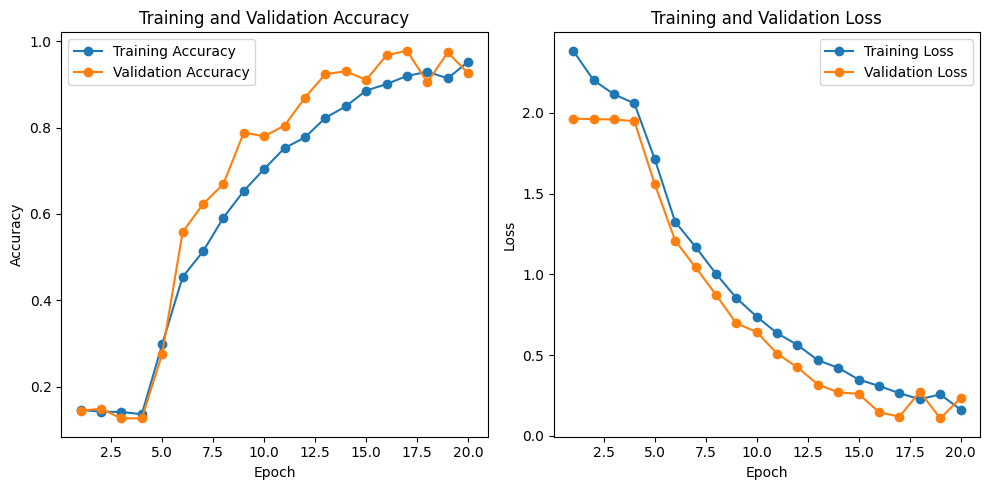

In [ ]:
import matplotlib.pyplot as plt

# Training details
epochs = range(1, 21)  # Assuming you have 20 epochs

# Accuracy
training_accuracy = [0.14595237374305725, 0.1421428620815277, 0.14142857491970062, 0.1361904740333557, 0.2985714375972748, 0.45404762029647827, 0.5130952596664429, 0.5914285778999329, 0.653333306312561, 0.704285740852356, 0.7526190280914307, 0.7773809432983398, 0.8226190209388733, 0.8492857217788696, 0.8857142925262451, 0.9009523987770081, 0.9195238351821899, 0.9295238256454468, 0.9140475988388062, 0.9526190757751465]
validation_accuracy = [0.14476190507411957, 0.1485714316368103, 0.12666666507720947, 0.12666666507720947, 0.27619048953056335, 0.5580952167510986, 0.6228571534156799, 0.6695238351821899, 0.7885714173316956, 0.7799999713897705, 0.8047618865966797, 0.869523823261261, 0.9238095283508301, 0.930476188659668, 0.9104762077331543, 0.9676190614700317, 0.9780952334403992, 0.9047619104385376, 0.9742857217788696, 0.9257143139839172]

# Loss
training_loss = [2.384814500808716, 2.2022345066070557, 2.1148533821105957, 2.058884620666504, 1.7134655714035034, 1.3252222537994385, 1.1698909997940063, 1.0040282011032104, 0.8531174063682556, 0.7375940084457397, 0.6354910135269165, 0.5620580911636353, 0.4675821363925934, 0.42060017585754395, 0.3479441702365875, 0.3082225024700165, 0.26351094245910645, 0.2261631339788437, 0.2559974789619446, 0.1614556461572647]
validation_loss = [1.9638253450393677, 1.9608880281448364, 1.9589104652404785, 1.9485416412353516, 1.5594900846481323, 1.2090030908584595, 1.0436012744903564, 0.8739529252052307, 0.6959713101387024, 0.6428622603416443, 0.508580207824707, 0.42321622371673584, 0.31715232133865356, 0.26884952187538147, 0.2591445744037628, 0.1457105278968811, 0.11818627268075943, 0.2728610336780548, 0.10773275047540665, 0.23367439210414886]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


**Gasf**

In [ ]:
import os
from PIL import Image

def parcourir_repertoire(root_dir):
    images = []
    labels = []

    for subdir, dirs, _ in os.walk(root_dir):
        for folder in dirs:
            label = os.path.basename(folder)
            for file in os.listdir(os.path.join(subdir, folder)):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(subdir, folder, file)
                    image = Image.open(image_path)
                    images.append(image)
                    labels.append(label)

    return images, labels

# Spécifiez le répertoire racine ici
repertoire_racine = "/content/drive/MyDrive/hustUnzip/images_GASF_R7"

images, labels = parcourir_repertoire(repertoire_racine)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Map labels to numerical values
label_mapping = {"Normal": 0, "Ball": 1, "Inner": 2, "Outer": 3, "OuterBall": 4, "InnerBall": 5, "InnerOuter": 6}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Convert labels to one-hot encoded vectors
labels_one_hot = to_categorical(labels_numeric, num_classes=7)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
132/132 [==============================] - 495s 4s/step - loss: 2.1740 - accuracy: 0.2095 - val_loss: 1.7817 - val_accuracy: 0.2524
Epoch 2/10
132/132 [==============================] - 489s 4s/step - loss: 1.9558 - accuracy: 0.2357 - val_loss: 1.7410 - val_accuracy: 0.2095
Epoch 3/10
132/132 [==============================] - 521s 4s/step - loss: 1.7848 - accuracy: 0.2702 - val_loss: 1.8135 - val_accuracy: 0.2229
Epoch 4/10
132/132 [==============================] - 494s 4s/step - loss: 1.5693 - accuracy: 0.3410 - val_loss: 1.4594 - val_accuracy: 0.3590
Epoch 5/10
132/132 [==============================] - 482s 4s/step - loss: 1.3933 - accuracy: 0.4224 - val_loss: 1.3318 - val_accuracy: 0.5086
Epoch 6/10
132/132 [==============================] - 481s 4s/step - loss: 1.2572 - accuracy: 0.4898 - val_loss: 1.2857 - val_accuracy: 0.6143
Epoch 7/10
132/132 [==============================] - 480s 4s/step - loss: 1.1685 - accuracy: 0.5329 - val_loss: 1.2986 - val_accuracy: 0.5162

In [ ]:
print("training details :")
print("Accuracy :", history.history['accuracy'])
print("training loss :", history.history['loss'])
print("validation accuracy :", history.history['val_accuracy'])
print("validation loss :", history.history['val_loss'])

training details :
Accuracy : [0.20952381193637848, 0.23571428656578064, 0.27023810148239136, 0.3409523665904999, 0.4223809540271759, 0.48976191878318787, 0.5328571200370789, 0.5671428442001343, 0.621666669845581, 0.6557142734527588]
training loss : [2.1740119457244873, 1.955840826034546, 1.7848411798477173, 1.5692743062973022, 1.3933395147323608, 1.2572050094604492, 1.1684682369232178, 1.077644944190979, 0.9633366465568542, 0.9097462892532349]
validation accuracy : [0.25238096714019775, 0.20952381193637848, 0.22285714745521545, 0.35904762148857117, 0.508571445941925, 0.6142857074737549, 0.5161904692649841, 0.5485714077949524, 0.7028571367263794, 0.7257142663002014]
validation loss : [1.781682014465332, 1.7410342693328857, 1.8134790658950806, 1.459449052810669, 1.3318229913711548, 1.2856661081314087, 1.2985540628433228, 1.1827327013015747, 0.9019017815589905, 0.771706223487854]


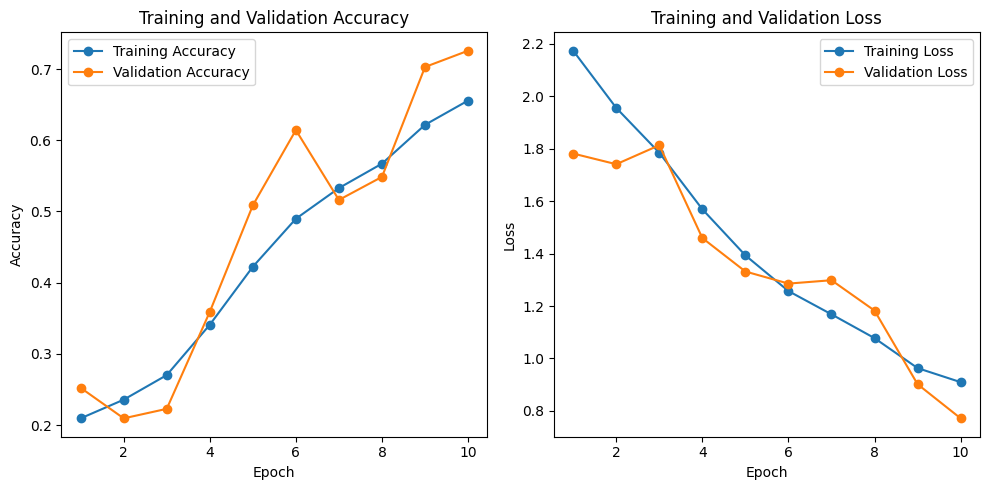

In [ ]:
import matplotlib.pyplot as plt

# Training details
epochs = range(1, 11)  # Assuming you have 10 epochs

# Accuracy
training_accuracy = [0.20952381193637848, 0.23571428656578064, 0.27023810148239136, 0.3409523665904999, 0.4223809540271759, 0.48976191878318787, 0.5328571200370789, 0.5671428442001343, 0.621666669845581, 0.6557142734527588]
validation_accuracy = [0.25238096714019775, 0.20952381193637848, 0.22285714745521545, 0.35904762148857117, 0.508571445941925, 0.6142857074737549, 0.5161904692649841, 0.5485714077949524, 0.7028571367263794, 0.7257142663002014]

# Loss
training_loss = [2.1740119457244873, 1.955840826034546, 1.7848411798477173, 1.5692743062973022, 1.3933395147323608, 1.2572050094604492, 1.1684682369232178, 1.077644944190979, 0.9633366465568542, 0.9097462892532349]
validation_loss = [1.781682014465332, 1.7410342693328857, 1.8134790658950806, 1.459449052810669, 1.3318229913711548, 1.2856661081314087, 1.2985540628433228, 1.1827327013015747, 0.9019017815589905, 0.771706223487854]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**Mtf**

In [ ]:
import os
from PIL import Image

def parcourir_repertoire(root_dir):
    images = []
    labels = []

    for subdir, dirs, _ in os.walk(root_dir):
        for folder in dirs:
            label = os.path.basename(folder)
            for file in os.listdir(os.path.join(subdir, folder)):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(subdir, folder, file)
                    image = Image.open(image_path)
                    images.append(image)
                    labels.append(label)

    return images, labels

# Spécifiez le répertoire racine ici
repertoire_racine = "/content/drive/MyDrive/hustUnzip/Mtf_images_R7"

images, labels = parcourir_repertoire(repertoire_racine)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Map labels to numerical values
label_mapping = {"Normal": 0, "Ball": 1, "Inner": 2, "Outer": 3, "OuterBall": 4, "InnerBall": 5, "InnerOuter": 6}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Convert labels to one-hot encoded vectors
labels_one_hot = to_categorical(labels_numeric, num_classes=7)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
132/132 [==============================] - 19s 65ms/step - loss: 2.0582 - accuracy: 0.2317 - val_loss: 1.4370 - val_accuracy: 0.4238
Epoch 2/10
132/132 [==============================] - 6s 48ms/step - loss: 1.5720 - accuracy: 0.3471 - val_loss: 1.2507 - val_accuracy: 0.4467
Epoch 3/10
132/132 [==============================] - 7s 51ms/step - loss: 1.3894 - accuracy: 0.3995 - val_loss: 1.2381 - val_accuracy: 0.4476
Epoch 4/10
132/132 [==============================] - 7s 50ms/step - loss: 1.3185 - accuracy: 0.4307 - val_loss: 1.1704 - val_accuracy: 0.4724
Epoch 5/10
132/132 [==============================] - 7s 50ms/step - loss: 1.2257 - accuracy: 0.4812 - val_loss: 1.0764 - val_accuracy: 0.5848
Epoch 6/10
132/132 [==============================] - 6s 48ms/step - loss: 1.0361 - accuracy: 0.5990 - val_loss: 1.0002 - val_accuracy: 0.6619
Epoch 7/10
132/132 [==============================] - 7s 52ms/step - loss: 0.8221 - accuracy: 0.6926 - val_loss: 0.8562 - val_accuracy: 0.690

In [ ]:
print("training details :")
print("Accuracy :", history.history['accuracy'])
print("training loss :", history.history['loss'])
print("validation accuracy :", history.history['val_accuracy'])
print("validation loss :", history.history['val_loss'])

training details :
Accuracy : [0.2316666692495346, 0.3471428453922272, 0.3995237946510315, 0.43071427941322327, 0.4811904728412628, 0.5990476012229919, 0.6926190257072449, 0.7495238184928894, 0.8040476441383362, 0.8240476250648499]
training loss : [2.058159112930298, 1.5720082521438599, 1.3894116878509521, 1.3185209035873413, 1.225722074508667, 1.0361071825027466, 0.8221150040626526, 0.6849480271339417, 0.5894237160682678, 0.5060038566589355]
validation accuracy : [0.4238095283508301, 0.4466666579246521, 0.4476190507411957, 0.47238096594810486, 0.584761917591095, 0.6619047522544861, 0.6904761791229248, 0.869523823261261, 0.8199999928474426, 0.8809523582458496]
validation loss : [1.4369556903839111, 1.2506568431854248, 1.2380584478378296, 1.1703522205352783, 1.076377511024475, 1.000208854675293, 0.8562048077583313, 0.4659225642681122, 0.4890805184841156, 0.38449960947036743]


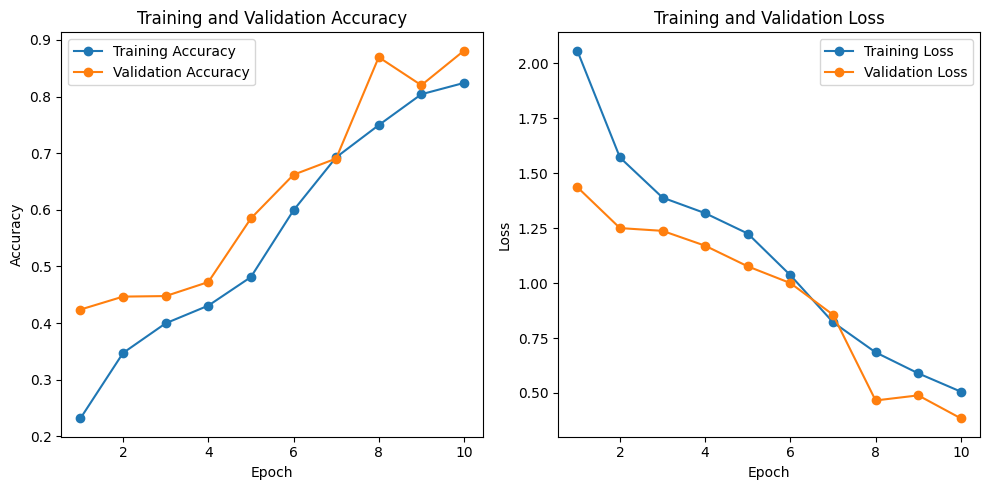

In [ ]:
import matplotlib.pyplot as plt

# Training details
epochs = range(1, 11)  # Assuming you have 10 epochs

# Accuracy
training_accuracy = [0.2316666692495346, 0.3471428453922272, 0.3995237946510315, 0.43071427941322327, 0.4811904728412628, 0.5990476012229919, 0.6926190257072449, 0.7495238184928894, 0.8040476441383362, 0.8240476250648499]
validation_accuracy = [0.4238095283508301, 0.4466666579246521, 0.4476190507411957, 0.47238096594810486, 0.584761917591095, 0.6619047522544861, 0.6904761791229248, 0.869523823261261, 0.8199999928474426, 0.8809523582458496]

# Loss
training_loss = [2.058159112930298, 1.5720082521438599, 1.3894116878509521, 1.3185209035873413, 1.225722074508667, 1.0361071825027466, 0.8221150040626526, 0.6849480271339417, 0.5894237160682678, 0.5060038566589355]
validation_loss = [1.4369556903839111, 1.2506568431854248, 1.2380584478378296, 1.1703522205352783, 1.076377511024475, 1.000208854675293, 0.8562048077583313, 0.4659225642681122, 0.4890805184841156, 0.38449960947036743]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**rp coloree**

In [ ]:
import os
from PIL import Image

def parcourir_repertoire(root_dir):
    images = []
    labels = []

    for subdir, dirs, _ in os.walk(root_dir):
        for folder in dirs:
            label = os.path.basename(folder)
            for file in os.listdir(os.path.join(subdir, folder)):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(subdir, folder, file)
                    image = Image.open(image_path)
                    images.append(image)
                    labels.append(label)

    return images, labels

# Spécifiez le répertoire racine ici
repertoire_racine = "/content/drive/MyDrive/hustUnzip/Rp_Colored_images_R7"

images, labels = parcourir_repertoire(repertoire_racine)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Map labels to numerical values
label_mapping = {"Normal": 0, "Ball": 1, "Inner": 2, "Outer": 3, "OuterBall": 4, "InnerBall": 5, "InnerOuter": 6}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Convert labels to one-hot encoded vectors
labels_one_hot = to_categorical(labels_numeric, num_classes=7)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
132/132 [==============================] - 10s 58ms/step - loss: 2.4421 - accuracy: 0.1414 - val_loss: 1.9603 - val_accuracy: 0.1362
Epoch 2/10
132/132 [==============================] - 7s 50ms/step - loss: 2.1086 - accuracy: 0.1874 - val_loss: 1.6496 - val_accuracy: 0.3552
Epoch 3/10
132/132 [==============================] - 7s 50ms/step - loss: 1.6193 - accuracy: 0.3214 - val_loss: 1.3706 - val_accuracy: 0.4257
Epoch 4/10
132/132 [==============================] - 6s 49ms/step - loss: 1.3943 - accuracy: 0.3976 - val_loss: 1.2888 - val_accuracy: 0.4943
Epoch 5/10
132/132 [==============================] - 7s 50ms/step - loss: 1.2190 - accuracy: 0.4610 - val_loss: 1.1233 - val_accuracy: 0.4800
Epoch 6/10
132/132 [==============================] - 6s 49ms/step - loss: 1.1510 - accuracy: 0.4893 - val_loss: 1.0959 - val_accuracy: 0.5895
Epoch 7/10
132/132 [==============================] - 7s 52ms/step - loss: 1.0708 - accuracy: 0.5345 - val_loss: 0.9844 - val_accuracy: 0.594

In [ ]:
print("training details :")
print("Accuracy :", history.history['accuracy'])
print("training loss :", history.history['loss'])
print("validation accuracy :", history.history['val_accuracy'])
print("validation loss :", history.history['val_loss'])

training details :
Accuracy : [0.14142857491970062, 0.18738095462322235, 0.3214285671710968, 0.3976190388202667, 0.46095237135887146, 0.4892857074737549, 0.5345237851142883, 0.5571428537368774, 0.5940476059913635, 0.618571400642395]
training loss : [2.442075490951538, 2.10858154296875, 1.6193490028381348, 1.3942956924438477, 1.2189594507217407, 1.1510173082351685, 1.0708281993865967, 1.0069797039031982, 0.9359080195426941, 0.8941133618354797]
validation accuracy : [0.1361904740333557, 0.3552381098270416, 0.42571428418159485, 0.4942857027053833, 0.47999998927116394, 0.5895237922668457, 0.5942857265472412, 0.6285714507102966, 0.7142857313156128, 0.5809524059295654]
validation loss : [1.9603002071380615, 1.6495589017868042, 1.3705955743789673, 1.2888166904449463, 1.1233268976211548, 1.0958521366119385, 0.9843617677688599, 0.9028741121292114, 0.7841024994850159, 1.2449384927749634]


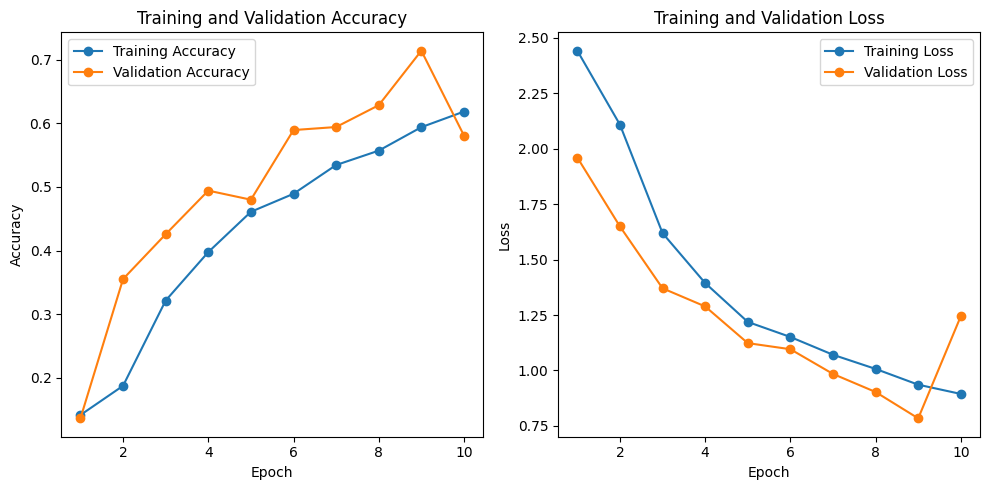

In [ ]:
import matplotlib.pyplot as plt

# Training details
epochs = range(1, 11)  # Assuming you have 10 epochs

# Accuracy
training_accuracy = [0.14142857491970062, 0.18738095462322235, 0.3214285671710968, 0.3976190388202667, 0.46095237135887146, 0.4892857074737549, 0.5345237851142883, 0.5571428537368774, 0.5940476059913635, 0.618571400642395]
validation_accuracy = [0.1361904740333557, 0.3552381098270416, 0.42571428418159485, 0.4942857027053833, 0.47999998927116394, 0.5895237922668457, 0.5942857265472412, 0.6285714507102966, 0.7142857313156128, 0.5809524059295654]

# Loss
training_loss = [2.442075490951538, 2.10858154296875, 1.6193490028381348, 1.3942956924438477, 1.2189594507217407, 1.1510173082351685, 1.0708281993865967, 1.0069797039031982, 0.9359080195426941, 0.8941133618354797]
validation_loss = [1.9603002071380615, 1.6495589017868042, 1.3705955743789673, 1.2888166904449463, 1.1233268976211548, 1.0958521366119385, 0.9843617677688599, 0.9028741121292114, 0.7841024994850159, 1.2449384927749634]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

**rp binaire**

In [ ]:
import os
from PIL import Image

def parcourir_repertoire(root_dir):
    images = []
    labels = []

    for subdir, dirs, _ in os.walk(root_dir):
        for folder in dirs:
            label = os.path.basename(folder)
            for file in os.listdir(os.path.join(subdir, folder)):
                if file.endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(subdir, folder, file)
                    image = Image.open(image_path)
                    images.append(image)
                    labels.append(label)

    return images, labels

# Spécifiez le répertoire racine ici
repertoire_racine = "/content/drive/MyDrive/hustUnzip/Rp_Binary_images_R7"

images, labels = parcourir_repertoire(repertoire_racine)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Map labels to numerical values
label_mapping = {"Normal": 0, "Ball": 1, "Inner": 2, "Outer": 3, "OuterBall": 4, "InnerBall": 5, "InnerOuter": 6}
labels_numeric = np.array([label_mapping[label] for label in labels])

# Convert labels to one-hot encoded vectors
labels_one_hot = to_categorical(labels_numeric, num_classes=7)

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
132/132 [==============================] - 11s 58ms/step - loss: 2.3563 - accuracy: 0.1514 - val_loss: 1.9707 - val_accuracy: 0.1267
Epoch 2/20
132/132 [==============================] - 7s 55ms/step - loss: 2.2332 - accuracy: 0.1348 - val_loss: 1.9533 - val_accuracy: 0.1267
Epoch 3/20
132/132 [==============================] - 7s 51ms/step - loss: 1.9737 - accuracy: 0.2031 - val_loss: 1.8919 - val_accuracy: 0.1476
Epoch 4/20
132/132 [==============================] - 7s 53ms/step - loss: 1.5566 - accuracy: 0.3486 - val_loss: 1.4201 - val_accuracy: 0.3971
Epoch 5/20
132/132 [==============================] - 7s 51ms/step - loss: 1.3499 - accuracy: 0.4260 - val_loss: 1.2828 - val_accuracy: 0.5124
Epoch 6/20
132/132 [==============================] - 7s 53ms/step - loss: 1.2264 - accuracy: 0.4752 - val_loss: 1.3101 - val_accuracy: 0.4086
Epoch 7/20
132/132 [==============================] - 7s 52ms/step - loss: 1.1236 - accuracy: 0.5202 - val_loss: 1.2572 - val_accuracy: 0.445

In [ ]:
print("training details :")
print("Accuracy :", history.history['accuracy'])
print("training loss :", history.history['loss'])
print("validation accuracy :", history.history['val_accuracy'])
print("validation loss :", history.history['val_loss'])

training details :
Accuracy : [0.15142856538295746, 0.13476189970970154, 0.2030952423810959, 0.34857141971588135, 0.42595237493515015, 0.4752380847930908, 0.5202381014823914, 0.5742856860160828, 0.635952353477478, 0.6897618770599365, 0.7388095259666443, 0.7735714316368103, 0.8052380681037903, 0.8261904716491699, 0.8438095450401306, 0.8676190376281738, 0.878333330154419, 0.8847619295120239, 0.8919047713279724, 0.9085714221000671]
training loss : [2.3563287258148193, 2.2331833839416504, 1.9737142324447632, 1.5566215515136719, 1.3499089479446411, 1.2263829708099365, 1.1236252784729004, 1.006717324256897, 0.8659912347793579, 0.771154522895813, 0.6836522221565247, 0.6129674315452576, 0.5432780385017395, 0.5006342530250549, 0.4463404417037964, 0.3898794949054718, 0.36138173937797546, 0.3484385311603546, 0.32261696457862854, 0.29133856296539307]
validation accuracy : [0.12666666507720947, 0.12666666507720947, 0.14761905372142792, 0.39714285731315613, 0.5123809576034546, 0.40857142210006714, 0

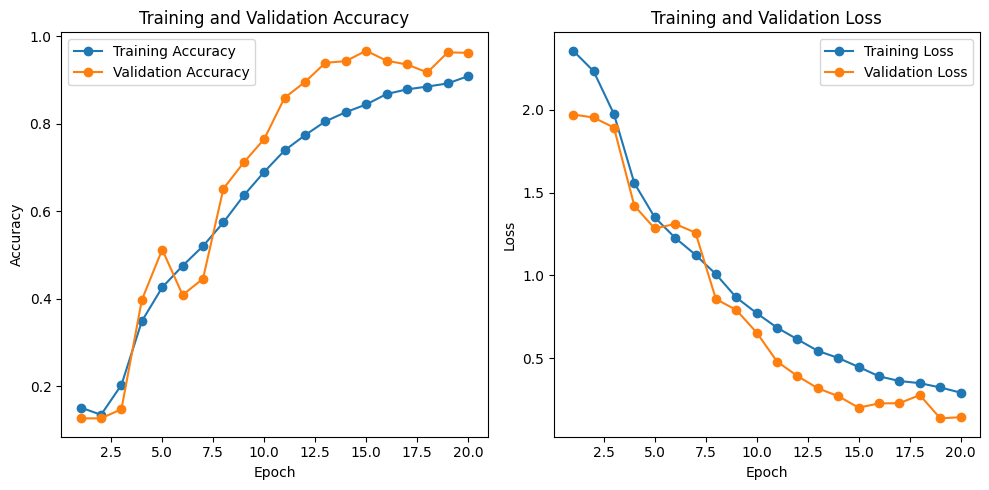

In [ ]:
import matplotlib.pyplot as plt

# Training details
epochs = range(1, 21)  # Assuming you have 20 epochs

# Accuracy
training_accuracy = [0.15142856538295746, 0.13476189970970154, 0.2030952423810959, 0.34857141971588135, 0.42595237493515015, 0.4752380847930908, 0.5202381014823914, 0.5742856860160828, 0.635952353477478, 0.6897618770599365, 0.7388095259666443, 0.7735714316368103, 0.8052380681037903, 0.8261904716491699, 0.8438095450401306, 0.8676190376281738, 0.878333330154419, 0.8847619295120239, 0.8919047713279724, 0.9085714221000671]
validation_accuracy = [0.12666666507720947, 0.12666666507720947, 0.14761905372142792, 0.39714285731315613, 0.5123809576034546, 0.40857142210006714, 0.4457142949104309, 0.6514285802841187, 0.7114285826683044, 0.7647619247436523, 0.8590475916862488, 0.8952381014823914, 0.939047634601593, 0.9428571462631226, 0.9666666388511658, 0.9438095092773438, 0.9352381229400635, 0.9171428680419922, 0.9628571271896362, 0.961904764175415]

# Loss
training_loss = [2.3563287258148193, 2.2331833839416504, 1.9737142324447632, 1.5566215515136719, 1.3499089479446411, 1.2263829708099365, 1.1236252784729004, 1.006717324256897, 0.8659912347793579, 0.771154522895813, 0.6836522221565247, 0.6129674315452576, 0.5432780385017395, 0.5006342530250549, 0.4463404417037964, 0.3898794949054718, 0.36138173937797546, 0.3484385311603546, 0.32261696457862854, 0.29133856296539307]
validation_loss = [1.970652461051941, 1.9532517194747925, 1.8918755054473877, 1.4200679063796997, 1.2827808856964111, 1.3101131916046143, 1.2572280168533325, 0.8564327359199524, 0.7904086709022522, 0.6538974046707153, 0.47883719205856323, 0.3916095495223999, 0.3174595534801483, 0.26989075541496277, 0.20065169036388397, 0.22620336711406708, 0.22763699293136597, 0.27647140622138977, 0.13604475557804108, 0.1428782343864441]

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
